# Lab Assignment
Name: **Rafiqul Islam** ; 
student id : **12123971**

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# 1 Dataset
(a)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print("x train shape : {}".format(x_train.shape))
print("y train shape : {}".format(y_train.shape))
print("x test shape : {}".format(x_test.shape))
print("y test shape : {}\n".format(y_test.shape))

x_train_shape = x_train.shape

#reshape y_train and y_test to 1d array
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

#Number of training and test samples
no_of_training = len(x_train)
no_of_test_samples = len(x_test)
print("Number of training sample: {}".format(no_of_training))
print("Number of test sample: {}".format(no_of_test_samples))

#Size of the images
print("\nSize of the images: {}X{}".format(x_train_shape[1],x_train_shape[2]))

#Number of color channels
print("\nNumber of color channels: {}".format(x_train_shape[3]))

#Number of classes
unique_classes = np.unique(y_train)
print("\nNumber of classes: {}\n ".format(len(unique_classes)))

#Number of samples for each class
for item in unique_classes:
  count = (y_train == item).sum()
  print("Samples in {} class = {} ".format(item, count))
print('')

#Class label corresponding to each class
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for item in unique_classes:
  print("Class {} is {}".format(item, class_labels[item]))


170508288/170498071 [==============================] - 3s 0us/step
x train shape : (50000, 32, 32, 3)
y train shape : (50000, 1)
x test shape : (10000, 32, 32, 3)
y test shape : (10000, 1)

Number of training sample: 50000
Number of test sample: 10000

Size of the images: 32X32

Number of color channels: 3

Number of classes: 10
 
Samples in 0 class = 5000 
Samples in 1 class = 5000 
Samples in 2 class = 5000 
Samples in 3 class = 5000 
Samples in 4 class = 5000 
Samples in 5 class = 5000 
Samples in 6 class = 5000 
Samples in 7 class = 5000 
Samples in 8 class = 5000 
Samples in 9 class = 5000 

Class 0 is airplane
Class 1 is automobile
Class 2 is bird
Class 3 is cat
Class 4 is deer
Class 5 is dog
Class 6 is frog
Class 7 is horse
Class 8 is ship
Class 9 is truck


(b)

In [3]:
x_train_norm = x_train/255
x_test_norm = x_test/255

(c)

0 : airplane


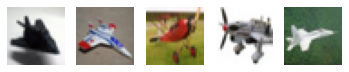

1 : automobile


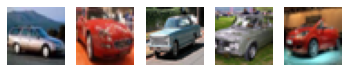

2 : bird


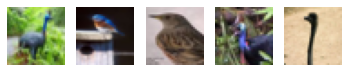

3 : cat


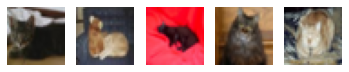

4 : deer


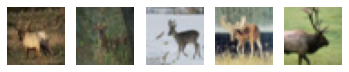

5 : dog


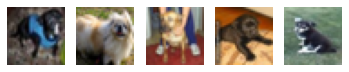

6 : frog


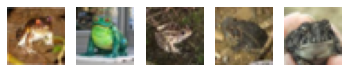

7 : horse


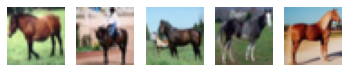

8 : ship


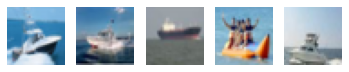

9 : truck


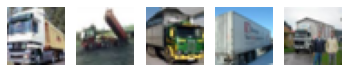

In [4]:
# For each class, showing 5 images.

for class_index in unique_classes:
  fig, ax = plt.subplots(nrows=1,ncols=5)
  plot_counter = 0
  photo_index = 0
  print("{} : {}".format(class_index, class_labels[class_index])) 
  while(plot_counter < 5):
    if(y_train[photo_index] == class_index):
      plt.sca(ax[plot_counter]); 
      plt.imshow((x_train[photo_index])) 
      plt.axis('off')
      plot_counter += 1
    photo_index +=1
  plt.show()

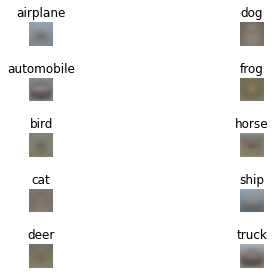

In [5]:
# For each class, showing average images.
fig2, ax2 = plt.subplots(5, 2)
fig2.tight_layout()
for class_index in unique_classes:
  index_y_current_class = np.where(y_train == class_index)[0]
  ax_index = class_index % 5, 0 if class_index < 5 else 1
  ax2[ax_index].imshow(np.average(x_train_norm[index_y_current_class], axis=0))
  ax2[ax_index].set_title(class_labels[class_index])
  ax2[ax_index].axis('off')
  ax2[ax_index].grid(False)
  
plt.show()

(d)

In [6]:
#chance level of this dataset
print("Chance level of this dataset is : 1/{} = {}".format(len(unique_classes), 1/len(unique_classes)))
#Here each class have same probability and we have total 10 classes that's why chance level is 1/10.

Chance level of this dataset is : 1/10 = 0.1


# 2 Random forest
(a)

In [25]:
# Train a random forest with 1000 trees on the training dataset
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn
from sklearn.ensemble import RandomForestClassifier


In [13]:

x_train_norm_reshape = x_train_norm.reshape(50000, 32 * 32 * 3)
y_train_norm_reshape  = y_train.flatten()
# print(reshape_x_train)
# print(reshape_y_train)
random_seed = np.random.seed(1111)
rand_forest_clss = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
rand_forest_model = rand_forest_clss.fit(x_train_norm_reshape, y_train_norm_reshape)


(b)

In [17]:
# predict the labels of the test set
x_test_norm_reshape  = x_test_norm.reshape(10000, 32 * 32 * 3)
# y_test_norm_reshape  = y_test_norm.reshape(1, -1)
y_predicted = rand_forest_clss.predict(x_test_norm_reshape)
y_predicted

array([2, 8, 8, ..., 3, 5, 7], dtype=uint8)

(c)

In [18]:
rand_forest_accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
print("Accuracy of the classifier: ", rand_forest_accuracy)

Accuracy of the classifier:  0.4956


(d)

            airplane  automobile  bird  cat  ...  frog  horse  ship  truck
airplane         570          29    54   13  ...    26     27   168     68
automobile        24         577    10   32  ...    38     27    61    184
bird              98          42   354   78  ...   127     59    28     31
cat               52          36    56  286  ...   156     58    20     78
deer              51          18   138   46  ...   152     99    24     20
dog               30          26    80  138  ...    87     91    26     34
frog              10          29    73   60  ...   620     26     6     45
horse             47          39    42   44  ...    52    495    23     93
ship              80          80    18   21  ...    13     22   633     79
truck             48         154    16   28  ...    29     38    71    589

[10 rows x 10 columns]


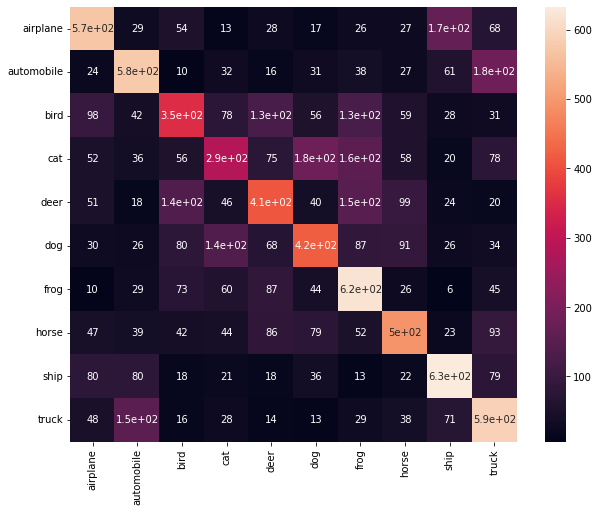

In [34]:
c_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted)
df_c_matrix = pd.DataFrame(c_matrix, index=[clss for clss in class_labels], columns=[clss for clss in class_labels])
print(df_c_matrix)
plt.figure(figsize=(10, 8))
sb.heatmap(df_c_matrix, annot=True)
plt.show()

(e)

In [29]:
print("Here those classes which have similar color patterns and shapes are most often confused with one to another. "
"There are some good examples of confusion, like trucks and automobiles or cats, dogs and deers, or planes and ships etc.")

Here those classes which have similar color patterns and shapes are most often confused with one to another. There are some good examples of confusion, like trucks and automobiles or cats, dogs and deers, or planes and ships etc.


# 3 Neural networks
(a)

In [35]:
import tensorflow as tf
from keras import models, layers
from tensorflow.keras.utils import to_categorical

In [36]:
y_train_cat = to_categorical(y_train.flatten(), num_classes=10)
y_test_cat = to_categorical(y_test.flatten(), num_classes=10)


In [37]:
tf.random.set_seed(2222)
np.random.seed(2222)

model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(20, activation='relu'),
    layers.Dense(10)
])

(b)

In [38]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])


(c)

In [45]:
model.summary()
total_parameters = model.count_params()
print(f"Total parameters: {total_parameters}")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                61460     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 61,670
Trainable params: 61,670
Non-trainable params: 0
_________________________________________________________________
Total parameters: 61670


(d)

Epoch 1/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5265 - accuracy: 0.4619 - val_loss: 1.6186 - val_accuracy: 0.4322
Epoch 2/30
1250/1250 [==============================] - 3s 2ms/step - loss: 1.5212 - accuracy: 0.4627 - val_loss: 1.5932 - val_accuracy: 0.4369
Epoch 3/30
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5181 - accuracy: 0.4640 - val_loss: 1.6197 - val_accuracy: 0.4299
Epoch 4/30
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5168 - accuracy: 0.4623 - val_loss: 1.6169 - val_accuracy: 0.4334
Epoch 5/30
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5106 - accuracy: 0.4640 - val_loss: 1.6008 - val_accuracy: 0.4340
Epoch 6/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5092 - accuracy: 0.4660 - val_loss: 1.5997 - val_accuracy: 0.4360
Epoch 7/30
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5040 - accuracy: 0.4679 - val_loss: 1.6157 - val_accuracy:

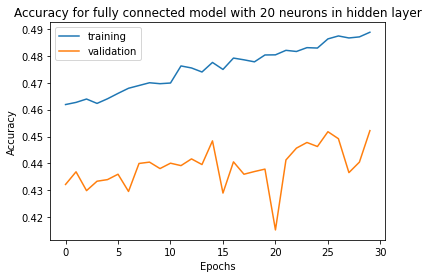

No, the model does not overfit, since the validation accuracy is still increasing. Yes, it would make sense to train the model for more epochs, since we are only at 0.38 val_accuracy. However, the increase of accuracy is already slowing down at 30th epoch, meaning we will not get a significant increase in accuracy.


In [47]:
h = model.fit(x_train_norm, y_train_cat, epochs=30, validation_split=0.2)

plt.plot(h.history["accuracy"], label="training")
plt.plot(h.history["val_accuracy"], label="validation")
plt.title("Accuracy for fully connected model with 20 neurons in hidden layer")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
# TODO change explanation, since with the CategoricalCrossentropy its now overfitting
print(f"No, the model does not overfit, since the validation accuracy is still increasing. Yes, it would make sense to "
      "train the model for more epochs, since we are only at 0.38 val_accuracy. However, the increase of accuracy is "
      "already slowing down at 30th epoch, meaning we will not get a significant increase in accuracy.")

(e)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               307300    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________
Total parameter: 308310
Epoch 1/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3190 - accuracy: 0.2386 - val_loss: 0.3045 - val_accuracy: 0.2728
Epoch 2/30
1250/1250 [==============================] - 4s 4ms/step - loss: 0.2986 - accuracy: 0.3137 - val_loss: 0.2946 - val_accuracy: 0.3287
Epoch 3/30
1250/1250 [==============================] - 5s 4ms/ste

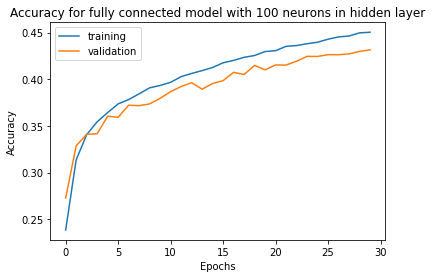

In [48]:
# """------------- (e) """
# """------------- (e.a) """
tf.random.set_seed(3333)
np.random.seed(3333)

model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(100, activation='relu'),
    layers.Dense(10)
])

# """------------- (e.b) """
## TODO change loss to tf.keras.losses.CategoricalCrossentropy
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# """------------- (e.c) """
model.summary()
print(f"Total parameter: {model.count_params()}")


# """------------- (e.d) """
h = model.fit(x_train_norm, y_train_cat, epochs=30, validation_split=0.2)

plt.plot(h.history["accuracy"], label="training")
plt.plot(h.history["val_accuracy"], label="validation")
plt.title("Accuracy for fully connected model with 100 neurons in hidden layer")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

(f)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                64010     
Total params: 65,802
Trainable params: 65,802
Non-trainable params: 0
_________________________________________________________________
Total parameter: 65802
Epoch 1/30
1250/1250 [==============================] - 37s 30ms/step - loss: 0.3318 - accuracy: 0.1856 - val_loss: 0.3199 - val_accuracy: 0.2371
Epoch 2/30
1250/1250 [==============================] - 37s 30ms/step - loss: 0

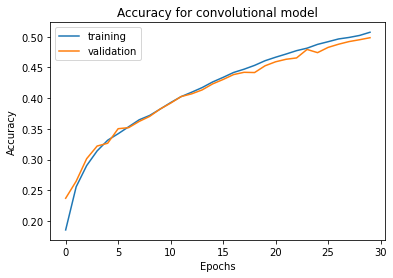

No, the model is not overfitting, since the validation accuracy is still increasing. Yes, it would make sense to increase the epochs, since we are only at 0.5 val_accuracy and also the accuracy is still increasing rapidly.
Conv2D: 
MaxPooling2D: 


In [49]:
# """------------- (f) """
# """------------- (f.a) """
tf.random.set_seed(4444)
np.random.seed(4444)

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(),
    layers.Dense(10)
])
# """------------- (f.b) """
## TODO change loss to tf.keras.losses.CategoricalCrossentropy
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
# """------------- (f.c) """
model.summary()
print(f"Total parameter: {model.count_params()}")
# """------------- (f.d) """
h = model.fit(x_train_norm, y_train_cat, epochs=30, validation_split=0.2)
plt.plot(h.history["accuracy"], label="training")
plt.plot(h.history["val_accuracy"], label="validation")
plt.title("Accuracy for convolutional model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## TODO change explanation, since with the CategoricalCrossentropy its now overfitting
print("No, the model is not overfitting, since the validation accuracy is still increasing. Yes, it would make sense "
      "to increase the epochs, since we are only at 0.5 val_accuracy and also the accuracy is still increasing "
      "rapidly.")

print("Conv2D: \nMaxPooling2D: ")


(g)

In [ ]:
#"""------------- (g) """
#"""------------- (g.a) """
tf.random.set_seed(5555)
np.random.seed(5555)

# model = models.Sequential([
#     layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(10)
# ])
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=(32, 32, 3), activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

#"""------------- (g.b) """
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#"""------------- (g.c) """
model.summary()
print(f"Total parameter: {model.count_params()}")
#"""------------- (g.d) """
h = model.fit(x_train_norm, y_train_cat, epochs=30, validation_split=0.2)
plt.plot(h.history["accuracy"], label="training")
plt.plot(h.history["val_accuracy"], label="validation")
plt.title("Accuracy for convolutional model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


1250/1250 [==============================] - 209s 166ms/step - loss: 1.8790 - accuracy: 0.3158 - val_loss: 1.6358 - val_accuracy: 0.4100
Epoch 2/30
 587/1250 [=============>................] - ETA: 1:44 - loss: 1.6115 - accuracy: 0.4146

(h)

In [ ]:
#"""------------- (h) """
print("Accuracy: ", model.evaluate(x_test_norm, y_test_cat)[1])

y_pred = np.argmax(model.predict(x_test_norm), axis=1)
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[c for c in class_labels.values()], columns=[c for c in class_labels.values()])
plt.figure(figsize=(10, 7))
sb.heatmap(df_cm, annot=True)
plt.show()


print("The validation data is there to first check if the model is overfitting (if the val_accuracy is "
      "decreasing, then the model is overfitting the training data), and second to see when the "
      "model has reached its best accuracy without overfitting. At that point we can stop the training and "
      "use the test data to actually test the model on unknown data.")
